In [1]:
import PowerSensor as ps
import numpy as np
from smbus2 import SMBus, i2c_msg
import matplotlib.pyplot as plt
from IPython.display import clear_output
import cv2
import imp
import time

# 除了常用的模块，还需要import 90621模块
import Mlx90621 as Mlx90621

![](./img/mlx90621_img.jpg)

## 初始化

In [2]:
# 1. 初始化i2c，即准备用于操作红外测温传感器的i2c
i2c = ps.I2cPort()
# 2. 实例化红外测温传感器的对象
sensor = Mlx90621.mlx90621_helper(i2c)
# 3. 初始化红外测温传感器
sensor.sensor_init()
# 4。 初始化摄像头
cam1 = ps.ImageSensor()

/usr/lib/python2.7/dist-packages/Mlx90621.py:132: RuntimeWarning: overflow encountered in ubyte_scalars


## 温度阵列测试

这里提供了两个函数来读取传感器数据
1. sensor.sensor_read(): 这个函数可以读取到校正的温度数据;返回值有4项:(1)传感器本身温度，(2)温度阵列(16x4)，(3)最小温度，(4)最大温度
2. sensor.sensor_get_img(block_size=15)：可以函数可以读取到一个图像，这个图像是温度数据经过伪色处理的rgb图像，block_size是填充的色块大小

### 读取温度数据

In [11]:
x1, x2, x3, x4 = sensor.sensor_read()
print("传感器本身温度是： " + str(x1))
print("测量（看到）温度阵列是： " + str(x2))
print("测量温度最小值是： " + str(x3))
print("测量温度最大值是： " + str(x4))

传感器本身温度是： 36.70853158892781
测量（看到）温度阵列是： [19.52076333 18.82496852 18.36947801 14.90737531 20.54690899 20.30326203
 20.82600882 19.10676991 21.89554307 24.45890088 22.05777012 18.29867623
 21.99345029 23.2531097  22.43435587 20.80230739 23.08293985 23.95048024
 24.629493   21.30446969 22.83718048 24.01769583 23.80581959 21.38887569
 23.31887703 24.08156868 24.46276111 20.65753858 23.61202077 25.17866136
 24.88065447 21.07941283 23.08087638 25.26136767 23.04286191 21.22100491
 23.01638702 24.14304023 24.88733398 20.77798658 23.0822955  24.57686247
 24.44874565 20.90521239 22.77635629 23.66630873 24.84073306 20.10154866
 22.21445321 22.99874535 24.4021742  21.2156125  21.78063383 23.03481002
 22.86192686 20.66129623 20.70940526 21.49623116 22.57157765 18.80870933
 19.54534457 21.46301157 20.71153091 17.1935571 ]
测量温度最小值是： 14.907375312774263
测量温度最大值是： 25.26136766669589


### 读取伪色温度图像

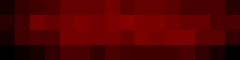

In [24]:
for i in range(1000):
    start = time.time()
    clear_output(True)
    x_img = sensor.sensor_get_img(block_size=15)
    # 由于传感器测量的温度范围是-22 到 300， 所以要进行一定程度的放大才方便观察
    ps.CommonFunction.show_img_jupyter(x_img * 5)
#     time.sleep(0.1)
    end = time.time()
#     print('t', end-start)

### 相机图像与红外传感器图像叠加

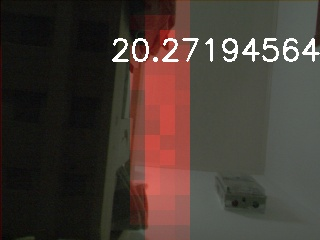

In [27]:
for i in range(200):
    start = time.time()
    clear_output(wait=True)
    imgMat = cam1.read_img_ori()
    tempImg = cv2.resize(imgMat, (320,240))
    
    #显示图像
#     display(img)
    end = time.time()
#     print(end - start)
    t_mon = sensor.sensor_read()[3]
    x_img = sensor.sensor_get_img(block_size=15)
    image_black = np.zeros_like(tempImg)
    x_img_rot = np.rot90(x_img)
    x_img_rot = np.rot90(x_img_rot)
    x_img_rot = np.rot90(x_img_rot)
    image_black[:, 130:190, :] = x_img_rot
    img_add = cv2.addWeighted(tempImg, 0.8, image_black, 5, 0)
    
    font=cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_add,str(t_mon + 10),(110,60), font, 1,(255,255,255),2)
    img = ps.CommonFunction.show_img_jupyter(img_add)
    time.sleep(0.1)